In [4]:
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.utils import ImageReader
import os
import mne
import json

from utils import *
import matplotlib
from et_qc import *
from eda_qc import *
from ecg_qc import *
from lsl_problem import *

# Testing ET with P5548165

In [21]:
subject = 'P5548165'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'

In [27]:
get_event_data('RestingState', import_physio_data(xdf_filename), stim_df)

,nSeq,RESPIRATION0,ECG1,EDA2,fSpO23,fSpO24,%SpO25,lsl_time_stamp,time
0,842379.0,0.20746,-0.14591,5.3345,0.55864,1.03932,87.0,690748.381216,130.525969
1,842380.0,0.20746,-0.14232,5.3360,0.55844,1.03987,87.0,690748.382884,130.527637
2,842381.0,0.20782,-0.13414,5.3356,0.55844,1.03987,87.0,690748.384551,130.529304
3,842382.0,0.20746,-0.13046,5.3345,0.55834,1.03973,87.0,690748.386219,130.530971
4,842383.0,0.20728,-0.13441,5.3364,0.55836,1.04015,87.0,690748.387886,130.532639
...,...,...,...,...,...,...,...,...,...
179912,1022291.0,-0.06628,-0.18293,2.6276,0.55281,1.02568,86.0,691048.374678,430.519430
179913,1022292.0,-0.06683,-0.19020,2.6283,0.55292,1.02565,86.0,691048.376345,430.521098
179914,1022293.0,-0.06729,-0.18023,2.6276,0.55298,1.02557,86.0,691048.378013,430.522765
179915,1022294.0,-0.06775,-0.16109,2.6260,0.55296,1.02556,86.0,691048.379680,430.524433


Effective sampling rate: 599.7197417792389
Average heart rate: 91.35346248003165
Kurtosis signal quality index: 15.296083885342213
Power spectrum distribution signal quality index: 0.7702810397091755
Relative power in baseline signal quality index: 19.487460785982304
Signal to Noise Ratio: 10.065223257261998


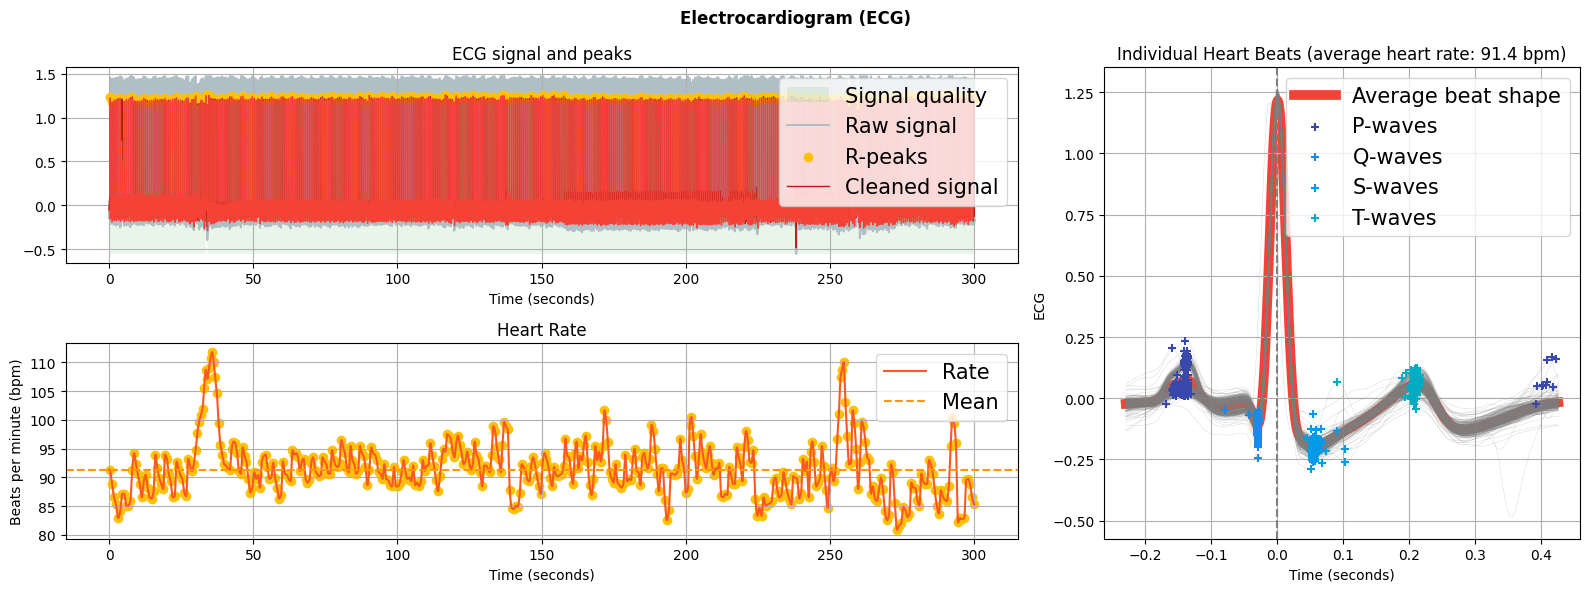

In [28]:
[ecg_vars, ecg_plt, ps_df, ecg_error] = ecg_qc(xdf_filename = xdf_filename, stim_df = stim_df, task='RestingState')

In [5]:
et_df = import_et_data(xdf_filename)
time_cols = et_df.filter(like = 'time').columns
val_cols = et_df.filter(like = 'validity').columns
qc_cols = time_cols.append(val_cols)
et_data_cols = et_df.columns.drop(qc_cols)

# percent non-NaN for each variable
val_df = pd.DataFrame(columns= ['variable', 'percent_valid'])
val_df['variable'] = et_data_cols

for i, var in enumerate(et_data_cols):
    val_df.loc[i, 'percent_valid'] = 1 - et_df[var].isna().mean()

In [18]:
root = val_df.loc[1, 'variable'].split("_in")[0]

In [19]:
val_df[val_df['variable'].str.contains(root)]

,variable,percent_valid
0,left_gaze_origin_in_user_coordinate_system_0,0.837203
1,left_gaze_origin_in_user_coordinate_system_1,0.837203
2,left_gaze_origin_in_user_coordinate_system_2,0.837203
6,left_gaze_origin_in_trackbox_coordinate_system_0,0.837203
7,left_gaze_origin_in_trackbox_coordinate_system_1,0.837203
8,left_gaze_origin_in_trackbox_coordinate_system_2,0.837203


In [14]:
re.sub(r"_\d+$", "", val_df.loc[1, 'variable'])

'left_gaze_origin_in_user_coordinate_system'

In [6]:
val_df

,variable,percent_valid
0,left_gaze_origin_in_user_coordinate_system_0,0.837203
1,left_gaze_origin_in_user_coordinate_system_1,0.837203
2,left_gaze_origin_in_user_coordinate_system_2,0.837203
3,right_gaze_origin_in_user_coordinate_system_0,0.804535
4,right_gaze_origin_in_user_coordinate_system_1,0.804535
5,right_gaze_origin_in_user_coordinate_system_2,0.804535
6,left_gaze_origin_in_trackbox_coordinate_system_0,0.837203
7,left_gaze_origin_in_trackbox_coordinate_system_1,0.837203
8,left_gaze_origin_in_trackbox_coordinate_system_2,0.837203
9,right_gaze_origin_in_trackbox_coordinate_system_0,0.804535


Effective sampling rate: 119.9959
Flag: all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter): True
Flag: % of NaNs is the same between coordinate systems (UCS and TBCS (gaze origin) and between UCS and display area (gaze point)): True
Mean difference in percent valid data between right and left eyes: 3.2147%
Percent of data with gaze point differences of over 0.2 mm: 0.0991%


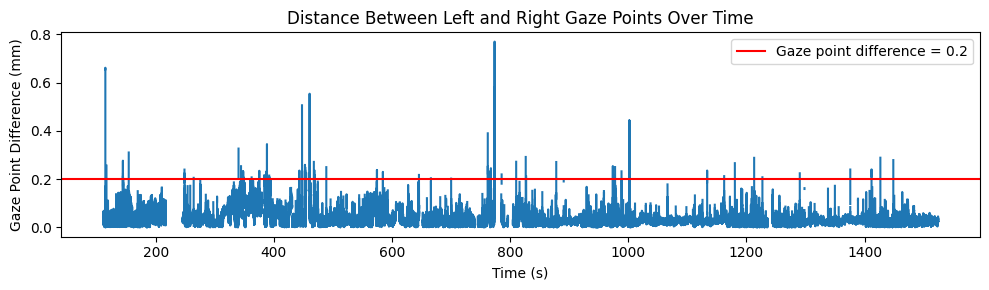

In [57]:
et_vars, et_df, et_error = et_qc(xdf_filename = xdf_filename, stim_df = stim_df, task='Experiment')

In [62]:
et_df.left_pupil_validity.mean()

np.float32(0.8352222)

In [63]:
et_df.left_gaze_origin_validity.mean()

np.float32(0.8372034)

In [24]:
stim_df = import_stim_data(xdf_filename)

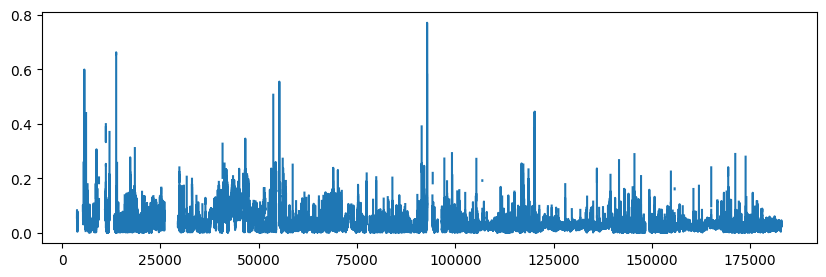

In [20]:
x1 = et_df.right_gaze_point_on_display_area_0
x2 = et_df.left_gaze_point_on_display_area_0
y1 = et_df.right_gaze_point_on_display_area_1
y2 = et_df.left_gaze_point_on_display_area_1
all_dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# plt with x = index 
plt.figure(figsize=(10, 3))
plt.plot(all_dists)

In [36]:
get_event_data(event = "RestingState", df = et_df, stim_df = stim_df)


,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter,lsl_time_stamp,time,diff
0,9.566562e+11,1.0,1.0,4.405524,-111.019165,735.597778,61.549683,-109.272552,732.750122,0.489389,...,0.448207,0.691243,0.446429,1.0,1.0,4.509247,4.642517,690748.387381,130.546076,0.008334
1,9.566562e+11,1.0,1.0,4.408916,-111.008789,735.613037,61.551483,-109.260887,732.720947,0.489383,...,0.457457,0.697706,0.437141,1.0,1.0,4.516434,4.643204,690748.395714,130.554410,0.008334
2,9.566562e+11,1.0,1.0,4.411083,-111.013176,735.598206,61.556595,-109.269203,732.748779,0.489379,...,0.460577,0.698299,0.440356,1.0,1.0,4.528885,4.636017,690748.404048,130.562744,0.008334
3,9.566562e+11,1.0,1.0,4.416933,-111.020081,735.628296,61.561199,-109.276588,732.762024,0.489368,...,0.452286,0.701809,0.431194,1.0,1.0,4.535110,4.641663,690748.412382,130.571077,0.008334
4,9.566562e+11,1.0,1.0,4.422386,-111.032257,735.597656,61.561455,-109.287781,732.730774,0.489358,...,0.456607,0.688949,0.452755,1.0,1.0,4.532745,4.673599,690748.420715,130.579411,0.008334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35994,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.347513,430.506209,0.008334
35995,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.355847,430.514542,0.008334
35996,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.364180,430.522876,0.008334
35997,9.569561e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,691048.372514,430.531210,0.008334


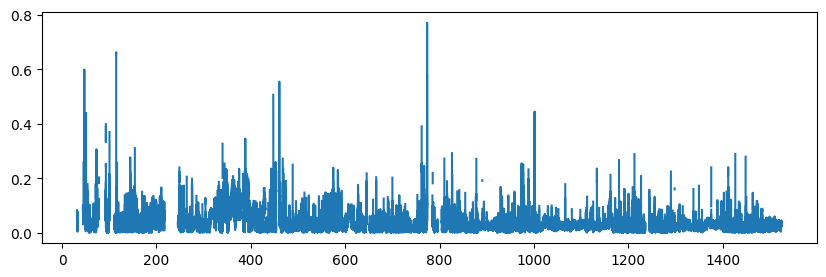

In [25]:
plt.figure(figsize=(10, 3))

plt.plot(et_df.time, all_dists)

In [28]:
et_df[["lsl_time_stamp", "time"]]

,lsl_time_stamp,time
0,690617.841304,0.000000
1,690617.849638,0.008334
2,690617.857972,0.016667
3,690617.866305,0.025001
4,690617.874639,0.033334
...,...,...
187763,693322.612947,2704.771642
187764,693322.621280,2704.779976
187765,693322.629614,2704.788310
187766,693322.637947,2704.796643


In [18]:
mic_df = get_event_data(event = 'RestingState', df = whole_mic_df, stim_df = stim_df)

In [38]:
time_cols = et_df.filter(like = 'time').columns
val_cols = et_df.filter(like = 'validity').columns
qc_cols = time_cols.append(val_cols)
et_data_cols = et_df.columns.drop(qc_cols)

# percent non-NaN for each variable
val_df = pd.DataFrame(columns= ['variable', 'percent_valid'])
val_df['variable'] = et_data_cols

for i, var in enumerate(et_data_cols):
    val_df.loc[i, 'percent_valid'] = 1 - et_df[var].isna().mean()

In [39]:
val_df

,variable,percent_valid
0,left_gaze_origin_in_user_coordinate_system_0,0.837203
1,left_gaze_origin_in_user_coordinate_system_1,0.837203
2,left_gaze_origin_in_user_coordinate_system_2,0.837203
3,right_gaze_origin_in_user_coordinate_system_0,0.804535
4,right_gaze_origin_in_user_coordinate_system_1,0.804535
5,right_gaze_origin_in_user_coordinate_system_2,0.804535
6,left_gaze_origin_in_trackbox_coordinate_system_0,0.837203
7,left_gaze_origin_in_trackbox_coordinate_system_1,0.837203
8,left_gaze_origin_in_trackbox_coordinate_system_2,0.837203
9,right_gaze_origin_in_trackbox_coordinate_system_0,0.804535


In [40]:
et_data_cols

Index(['left_gaze_origin_in_user_coordinate_system_0',
       'left_gaze_origin_in_user_coordinate_system_1',
       'left_gaze_origin_in_user_coordinate_system_2',
       'right_gaze_origin_in_user_coordinate_system_0',
       'right_gaze_origin_in_user_coordinate_system_1',
       'right_gaze_origin_in_user_coordinate_system_2',
       'left_gaze_origin_in_trackbox_coordinate_system_0',
       'left_gaze_origin_in_trackbox_coordinate_system_1',
       'left_gaze_origin_in_trackbox_coordinate_system_2',
       'right_gaze_origin_in_trackbox_coordinate_system_0',
       'right_gaze_origin_in_trackbox_coordinate_system_1',
       'right_gaze_origin_in_trackbox_coordinate_system_2',
       'left_gaze_point_in_user_coordinate_system_0',
       'left_gaze_point_in_user_coordinate_system_1',
       'left_gaze_point_in_user_coordinate_system_2',
       'right_gaze_point_in_user_coordinate_system_0',
       'right_gaze_point_in_user_coordinate_system_1',
       'right_gaze_point_in_user_coord

In [24]:
vars['sampling_rate'], vars['lsl_wav_duration_diff'], vars['num_NaN'], vars['percent_NaN'], vars['quan25'], vars['quan75'], vars['std'], vars['min'], vars['max'] = [0,0,0,0,0,0,0,0,0]


In [28]:
vars['quan75']

np.float64(0.0)

In [27]:
vars['sampling_rate'], vars['lsl_wav_duration_diff'], vars['num_NaN'], vars['percent_NaN'], vars['quan25'], vars['quan75'], vars['std'], vars['min'], vars['max'] = np.zeros(9)


# Testing other subs 

In [49]:
xdf_filename = "/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-P5293813/sub-P5293813_ses-S001_task-CUNY_run-001_mobi.xdf"

In [50]:
et_df = import_et_data(xdf_filename)

In [52]:
et_df.left_pupil_validity.mean()

np.float32(0.59288263)

In [11]:
et_df.left_gaze_point_validity.mean()

np.float32(0.59288263)

In [12]:
stim_df = import_stim_data(xdf_filename)
social_et_df = get_event_data('SocialTask', et_df, stim_df)

trigger recovery


100%|██████████| 12791/12791 [00:00<00:00, 175762.91it/s]


      value   length   start_time     end_time
0     False   899640     0.000000    20.400307
252   False  2407860   116.701888   171.302749
338   False   295470   202.603278   209.303364
400   False   136710   240.303889   243.403916
402   False   145530   243.703944   247.003974
408   False   238140   251.404068   256.804133
420   False   229320   261.304228   266.504290
432   False   158760   272.504410   276.104445
436   False   604170   276.504474   290.204673
740   False  2906190   427.306915   493.207958
972   False  2037420   616.509976   662.710701
1540  False  1433250   824.313339   856.813842
1542  False   705600   856.913866   872.914103
1970  False  1741950  1025.016586  1064.517203
2368  False   379260  1223.319795  1231.919912
2370  False  2073412  1232.019936  1279.036819
Audio Segment 1: Duration = 96.30 seconds
Audio Segment 2: Duration = 31.30 seconds
Audio Segment 3: Duration = 31.00 seconds
Audio Segment 4: Duration = 0.30 seconds
Audio Segment 5: Duration = 4.40 s

In [15]:
print(social_et_df.left_gaze_point_validity.mean())
print(social_et_df.right_gaze_point_validity.mean())
print(social_et_df.left_gaze_origin_validity.mean())
print(social_et_df.right_gaze_origin_validity.mean())

0.278804
0.004021745
0.28382427
0.0040494814


In [16]:
print(et_df.left_gaze_point_validity.mean())
print(et_df.right_gaze_point_validity.mean())
print(et_df.left_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())

0.59288263
0.49728572
0.59555095
0.5001004


In [25]:
story_et_df = get_event_data('StoryListening', et_df, stim_df)
print(story_et_df.left_gaze_point_validity.mean())
print(story_et_df.right_gaze_point_validity.mean())
print(story_et_df.left_gaze_origin_validity.mean())
print(story_et_df.right_gaze_origin_validity.mean())

0.75872016
0.7465839
0.7596921
0.74930143


# Vars for P5548165

In [31]:
social_et_df = get_event_data('SocialTask', et_df, stim_df)
story_et_df = get_event_data('StoryListening', et_df, stim_df)

In [33]:
print(story_et_df.left_gaze_point_validity.mean())
print(story_et_df.right_gaze_point_validity.mean())
print(story_et_df.left_gaze_origin_validity.mean())
print(story_et_df.right_gaze_origin_validity.mean())

0.92505026
0.8969898
0.9273734
0.8982923


In [32]:
print(social_et_df.left_gaze_point_validity.mean())
print(social_et_df.right_gaze_point_validity.mean())
print(social_et_df.left_gaze_origin_validity.mean())
print(social_et_df.right_gaze_origin_validity.mean())

nan
nan
nan
nan


In [34]:
print(et_df.left_gaze_point_validity.mean())
print(et_df.right_gaze_point_validity.mean())
print(et_df.left_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())

0.8352222
0.8030655
0.8372034
0.8045354


In [35]:
social_et_df

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter,lsl_time_stamp,time,diff


# 5293813

In [64]:
subject = 'P5293813'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'
stim_df = import_stim_data(xdf_filename)

trigger recovery


100%|██████████| 12791/12791 [00:00<00:00, 182465.24it/s]


      value   length   start_time     end_time
0     False   899640     0.000000    20.400307
252   False  2407860   116.701888   171.302749
338   False   295470   202.603278   209.303364
400   False   136710   240.303889   243.403916
402   False   145530   243.703944   247.003974
408   False   238140   251.404068   256.804133
420   False   229320   261.304228   266.504290
432   False   158760   272.504410   276.104445
436   False   604170   276.504474   290.204673
740   False  2906190   427.306915   493.207958
972   False  2037420   616.509976   662.710701
1540  False  1433250   824.313339   856.813842
1542  False   705600   856.913866   872.914103
1970  False  1741950  1025.016586  1064.517203
2368  False   379260  1223.319795  1231.919912
2370  False  2073412  1232.019936  1279.036819
Audio Segment 1: Duration = 96.30 seconds
Audio Segment 2: Duration = 31.30 seconds
Audio Segment 3: Duration = 31.00 seconds
Audio Segment 4: Duration = 0.30 seconds
Audio Segment 5: Duration = 4.40 s

In [65]:
et_df = import_et_data(xdf_filename)

In [66]:
social_et_df = get_event_data('SocialTask', et_df, stim_df)

In [67]:
story_et_df = get_event_data('StoryListening', et_df, stim_df)
print(story_et_df.left_gaze_point_validity.mean())
print(story_et_df.right_gaze_point_validity.mean())
print(story_et_df.left_gaze_origin_validity.mean())
print(story_et_df.right_gaze_origin_validity.mean())

0.75872016
0.7465839
0.7596921
0.74930143


In [68]:
print(social_et_df.left_gaze_point_validity.mean())
print(social_et_df.right_gaze_point_validity.mean())
print(social_et_df.left_gaze_origin_validity.mean())
print(social_et_df.right_gaze_origin_validity.mean())

0.278804
0.004021745
0.28382427
0.0040494814


In [69]:
print(et_df.left_gaze_point_validity.mean())
print(et_df.right_gaze_point_validity.mean())
print(et_df.left_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())

0.59288263
0.49728572
0.59555095
0.5001004


In [47]:
et_df.left_pupil_validity.mean()

np.float32(0.59288263)

In [48]:
et_df.right_pupil_validity.mean()

np.float32(0.49728572)

# 5198715

In [135]:
subject = 'P5198715'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'
stim_df = import_stim_data(xdf_filename)

In [136]:
et_df = import_et_data(xdf_filename)
et_df

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_coordinate_system_0,left_gaze_origin_in_user_coordinate_system_1,left_gaze_origin_in_user_coordinate_system_2,right_gaze_origin_in_user_coordinate_system_0,right_gaze_origin_in_user_coordinate_system_1,right_gaze_origin_in_user_coordinate_system_2,left_gaze_origin_in_trackbox_coordinate_system_0,...,left_gaze_point_on_display_area_1,right_gaze_point_on_display_area_0,right_gaze_point_on_display_area_1,left_pupil_validity,right_pupil_validity,left_pupil_diameter,right_pupil_diameter,lsl_time_stamp,time,diff
0,4.196161e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,707889.260620,0.000000,NaN
1,4.196169e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,707889.268954,0.008334,0.008334
2,4.196177e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,707889.277288,0.016667,0.008334
3,4.196186e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,707889.285621,0.025001,0.008334
4,4.196194e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,707889.293955,0.033334,0.008334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204771,5.902651e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,709595.743536,1706.482915,0.008334
204772,5.902660e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,709595.751869,1706.491249,0.008334
204773,5.902668e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,709595.760203,1706.499582,0.008334
204774,5.902676e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,709595.768537,1706.507916,0.008334


In [76]:
print(et_df.left_gaze_point_validity.mean())
print(et_df.right_gaze_point_validity.mean())
print(et_df.left_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())
print(et_df.left_pupil_validity.mean())
print(et_df.right_pupil_validity.mean())

0.0006397234
0.0008008751
0.0007422745
0.00082040863
0.0006397234
0.0008008751


In [79]:
story_et_df = get_event_data('StoryListening', et_df, stim_df)
print(story_et_df.left_gaze_point_validity.mean())
print(story_et_df.right_gaze_point_validity.mean())
print(story_et_df.left_gaze_origin_validity.mean())
print(story_et_df.right_gaze_origin_validity.mean())
print(story_et_df.left_pupil_validity.mean())
print(story_et_df.right_pupil_validity.mean())

0.00039635354
0.00033629997
0.00039635354
0.00034831068
0.00039635354
0.00033629997


In [ ]:
social_et_df = get_event_data('SocialTask', et_df, stim_df)
print(social_et_df.left_gaze_point_validity.mean())
print(social_et_df.right_gaze_point_validity.mean())
print(social_et_df.left_gaze_origin_validity.mean())
print(social_et_df.right_gaze_origin_validity.mean())
print(social_et_df.left_pupil_validity.mean())
print(social_et_df.right_pupil_validity.mean())

0.0007209006
0.001497255
0.0012199855
0.0015249819
0.0007209006
0.001497255


# P5548165

In [138]:
subject = 'P5548165'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'
stim_df = import_stim_data(xdf_filename)

In [139]:
et_df = import_et_data(xdf_filename)

In [82]:
social_et_df = get_event_data('SocialTask', et_df, stim_df)

In [134]:
print(et_df.left_gaze_point_validity.mean())
print(et_df.right_gaze_point_validity.mean())
print(et_df.left_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())
print(et_df.right_gaze_origin_validity.mean())

0.8352222
0.8030655
0.8372034
0.8045354
0.8045354


In [83]:
story_et_df = get_event_data('StoryListening', et_df, stim_df)
print(story_et_df.left_gaze_point_validity.mean())
print(story_et_df.right_gaze_point_validity.mean())
print(story_et_df.left_gaze_origin_validity.mean())
print(story_et_df.right_gaze_origin_validity.mean())

0.92505026
0.8969898
0.9273734
0.8982923


In [84]:
print(social_et_df.left_gaze_point_validity.mean())
print(social_et_df.right_gaze_point_validity.mean())
print(social_et_df.left_gaze_origin_validity.mean())
print(social_et_df.right_gaze_origin_validity.mean())

nan
nan
nan
nan


In [ ]:
stim_time = stim_df.loc[stim_df.event == 'Onset_SocialTask', 'lsl_time_stamp'].values[0]
et_index = et_df.loc[et_df.lsl_time_stamp >= stim_time].index[0]

stim_time1 = stim_df.loc[stim_df.event == 'Offset_SocialTask', 'lsl_time_stamp'].values[0]
et_index1 = et_df.loc[et_df.lsl_time_stamp >= stim_time1].index[0]

/var/folders/8t/3zxw9ymj0dz7gvv5vyvt45j4wh1rnl/T/ipykernel_11162/2162298209.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


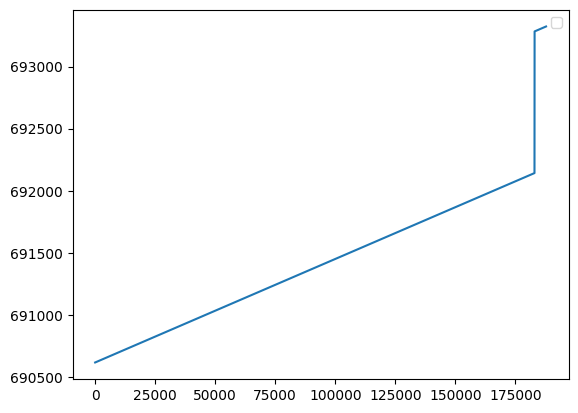

In [141]:
plt.plot(et_df.lsl_time_stamp)
# plt.hlines(stim_df.loc[stim_df.event == 'Onset_SocialTask', 'lsl_time_stamp'])

# plt.axvline(x=et_index, color='red', linestyle='--', label='Onset_SocialTask')
# plt.axvline(x=et_index1, color='orange', linestyle='--', label='Offset_SocialTask')
# plt.xlim([170000, 200000])
plt.legend()

In [131]:
percent_list = []
et_df['diff'] = et_df['lsl_time_stamp'].diff()
median = et_df['diff'].median() * 1.05
# number of loss instances  
loss_instances = (et_df['diff'] > median).sum()
if loss_instances != 0:
    # amount of data skipped: values for which diff>median 
    amt_data_lost = et_df.loc[et_df['diff'] > median, 'diff'].values[0].sum()
    # total amount of data: last - first lsl_time_stamp
    amt_data_total = et_df['lsl_time_stamp'].values[-1] - et_df['lsl_time_stamp'].values[0]
    
    percent_lost = amt_data_lost/amt_data_total * 100
else:
    percent_lost = 0
percent_list.append({'subject': 'p5548165', 'num_losses': loss_instances, 'percent_lost': f"{percent_lost:.4f}%"})

percent_data_loss = pd.DataFrame(percent_list)
percent_data_loss.sort_values(by='percent_lost', inplace=True, ascending=False)
nonzero_loss = percent_data_loss[percent_data_loss['num_losses'] != 0]
nonzero_loss

,subject,num_losses,percent_lost
0,p5548165,1,42.1485%
